## 밀라노 주택 가격
Milano House 발표 - 웹 스크래핑을 통한 데이터셋 생성

In [35]:
import pandas as pd
import numpy as np
import re
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [36]:
def extract_numeric_value(value):
    pattern = r'\d+'
    match = re.search(pattern, value)
    if match:
        return int(match.group())
    else:
        return None

In [37]:
def convert_to_numeric(df, column):
    return pd.to_numeric(df[column].astype(str).apply(extract_numeric_value), errors='coerce')

In [38]:
def plot_histogram_violin(df, column, x_label):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.histplot(
        data = df,
        x = column,
        bins = np.append(np.arange(0, math.ceil(df[column].quantile(0.999)) + 2 , 1), np.inf),
        ax = axs[0]
    )
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"{x_label} Histogram")
    
    sns.violinplot(
        data = df,
        y = column,
        ax = axs[1]
    )
    axs[1].set_ylabel(column)
    axs[1].set_xlabel("")
    axs[1].set_title(f"{x_label} Violin Plot")
    
    plt.tight_layout()
    
    plt.show()

In [39]:
#conda install openpyxl

In [40]:
df_milan_house_price = pd.read_excel(
    "/home/leejieun/workspace/kaggle-notebooks/datasets/tommasoramella/milano-housing-price/milano_housing_02_2_23.xlsx",
    sheet_name="Sheet1"
)
print(f'Data conntain {df_milan_house_price.shape[0]} records and {df_milan_house_price.shape[1]} columns. \n')

df_milan_house_price.head()

Data conntain 2130 records and 34 columns. 



,index,rooms,m2,bathrooms,floor,condominium_expenses,date,contract,typology,total_floors,...,energy_certification,co2_emissions,elevator,floor_level,heating_centralized,heating_radiator,heating_gas,air_conditiong_centralized,air_conditioning_heat,renewable_energy_performance_index_KWh/m2
0,0,3,140.0,2,4,535,08/02/2023,sale,apartment | entire property | stately property...,6 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,NaN
1,0,4,121.0,2,3,200,17/02/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,3,autonomous,to radiators,gas powered,system preparation,NaN,NaN
2,0,2,55.0,1,4,133,20/02/2023,sale,attic | entire property | stately property class,4 floors,...,NaN,NaN,1,4,autonomous,to radiators,gas powered,autonomous,cold/hot,NaN
3,0,2,60.0,1,5,333,11/01/2023,sale,attic | bare ownership | medium property class,5 floors,...,NaN,NaN,1,5,centralized,to radiators,methane powered,autonomous,cold,NaN
4,0,4,220.0,3,4,NaN,23/01/2023,sale,apartment | entire property | stately property...,7 floors,...,NaN,NaN,1,4,centralized,to radiators,methane powered,autonomous,cold/hot,351.0


In [41]:
print("Columns with Missing Values: \n")
df_milan_house_price.isnull().sum()

Columns with Missing Values: 



index                                           0
rooms                                          14
m2                                             17
bathrooms                                      25
floor                                         281
condominium_expenses                          460
date                                           14
contract                                       14
typology                                       14
total_floors                                   47
availability                                  441
other_features                                 36
price                                         143
year_of_build                                 237
condition                                     113
air_conditioning                              519
energy_efficiency                             154
city                                           14
neighborhood                                   14
car_parking                                  1542


In [42]:
Is_selected_columns = [
    "rooms", "m2", "bathrooms", "floor", "condominium_expenses",
    "date", "availability", "price", "year_of_build",
    "condition", "air_conditioning", "energy_efficiency", 
    "neighborhood", "car_parking", "elevator"
]

df_milan_house_price = df_milan_house_price[Is_selected_columns]
 
print(f'Data contain {df_milan_house_price.shape[0]} records and {df_milan_house_price.shape[1]} columns. \n')
 
print("Columns with Missing Values: \n")
df_milan_house_price.isnull().sum()

Data contain 2130 records and 15 columns. 

Columns with Missing Values: 



rooms                     14
m2                        17
bathrooms                 25
floor                    281
condominium_expenses     460
date                      14
availability             441
price                    143
year_of_build            237
condition                113
air_conditioning         519
energy_efficiency        154
neighborhood              14
car_parking             1542
elevator                   0
dtype: int64

In [43]:
df_milan_house_price.dtypes

rooms                    object
m2                      float64
bathrooms                object
floor                    object
condominium_expenses     object
date                     object
availability             object
price                   float64
year_of_build           float64
condition                object
air_conditioning         object
energy_efficiency        object
neighborhood             object
car_parking              object
elevator                  int64
dtype: object

In [44]:
df_milan_house_price.head(10)

,rooms,m2,bathrooms,floor,condominium_expenses,date,availability,price,year_of_build,condition,air_conditioning,energy_efficiency,neighborhood,car_parking,elevator
0,3,140.0,2,4,535,08/02/2023,libero,880000.0,1900.0,very good / refurbished,"autonomous, cold/heat",d248.59 kwh/m² year,centrale,NaN,1
1,4,121.0,2,3,200,17/02/2023,libero,649000.0,1960.0,very good / refurbished,system preparation,"e≥ 3,51 kwh/m² year",centrale,NaN,1
2,2,55.0,1,4,133,20/02/2023,libero,300000.0,2006.0,good / habitable,"autonomous, cold/heat",e183.89 kwh/m² year,viale ungheria - mecenate,1 in garage/box,1
3,2,60.0,1,5,333,11/01/2023,libero,250000.0,1960.0,very good / refurbished,"autonomous, cold",f138.8 kwh/m² year,città studi,NaN,1
4,4,220.0,3,4,NaN,23/01/2023,libero,2250000.0,1970.0,good / habitable,"autonomous, cold/heat","g≥ 3,51 kwh/m² year",piave - tricolore,1 in garage/box,1
5,4,136.0,2,7,325,16/02/2023,libero,920000.0,1969.0,good / habitable,"autonomous, cold/heat",d167.86 kwh/m² year,solari,1 in garage/box,1
6,4,150.0,2,T,300,12/01/2023,libero,950000.0,1960.0,very good / refurbished,"autonomous, cold/heat",f272.1 kwh/m² year,frua,NaN,1
7,2,73.0,1,T,83,23/02/2023,libero,445000.0,1930.0,good / habitable,NaN,g191.52 kwh/m² year,cadore,NaN,1
8,3 - 5,216.0,2,NaN,NaN,21/02/2023,NaN,NaN,NaN,NaN,"centralized, cold/heat",a≥ 175 kwh/m² year,vincenzo monti,NaN,0
9,4,120.0,3,R,208,11/01/2023,libero,670000.0,1940.0,very good / refurbished,"autonomous, cold",e196.05 kwh/m² year,città studi,NaN,1


In [45]:
floor_mapping = {
    'S': -1,  # Basement
    'T': 0,   # Ground floor
    'M': 0.5  # Mezzanine
}

ordinal_categories = ['new / under construction', 'very good / refurbished', 'good / habitable', 'to be restructured']
category_codes = ['NEW', 'VG', 'G', 'TBR']
ordinal_dtype = pd.CategoricalDtype(categories = ordinal_categories, ordered = True)

Categorical

In [46]:
df_milan_house_price['energy_class'] = df_milan_house_price['energy_efficiency'].str[0].astype('category').str.upper()

Numeric

In [47]:
df_milan_house_price['rooms']                = convert_to_numeric(df_milan_house_price, "rooms")
df_milan_house_price['m2']                   = convert_to_numeric(df_milan_house_price, "m2")
df_milan_house_price['bathrooms']            = convert_to_numeric(df_milan_house_price, "bathrooms")
df_milan_house_price['condominium_expenses'] = convert_to_numeric(df_milan_house_price, "condominium_expenses")
df_milan_house_price['floor'] = pd.to_numeric(
    df_milan_house_price['floor'].map(floor_mapping).fillna(df_milan_house_price['floor']),
    errors = 'coerce')

df_milan_house_price['energy_efficiency'] = df_milan_house_price['energy_efficiency'].str.extract(r'(\d+[\.,]?\d*)')
df_milan_house_price['energy_efficiency'] = df_milan_house_price['energy_efficiency'].str.replace(',', '.').astype(float)

Ordinal

In [48]:
df_milan_house_price['condition'] = pd.Categorical(
    df_milan_house_price['condition'],
    categories = ordinal_categories,
    ordered = True).rename_categories(category_codes)

Boolean

In [49]:
df_milan_house_price['air_conditioning'] = df_milan_house_price['air_conditioning'].fillna(False).astype(bool)
df_milan_house_price['availability']     = df_milan_house_price['availability'].fillna('').astype(bool)
df_milan_house_price['car_parking']      = df_milan_house_price['car_parking'].fillna(False).astype(bool)
df_milan_house_price['elevator']         = df_milan_house_price['elevator'].fillna(False).astype(bool)

In [50]:
df_milan_house_price.dtypes

rooms                    float64
m2                       float64
bathrooms                float64
floor                    float64
condominium_expenses     float64
date                      object
availability                bool
price                    float64
year_of_build            float64
condition               category
air_conditioning            bool
energy_efficiency        float64
neighborhood              object
car_parking                 bool
elevator                    bool
energy_class              object
dtype: object

In [51]:
df_milan_house_price.describe()

,rooms,m2,bathrooms,floor,condominium_expenses,price,year_of_build,energy_efficiency
count,2116.000000,2.113000e+03,2102.000000,1656.000000,1670.000000,1.987000e+03,1893.000000,1933.000000
mean,3.525520,7.096091e+02,1.972407,2.923913,234.590419,7.311284e+05,1961.295827,147.375629
std,16.257119,2.719078e+04,2.855258,2.497178,162.023635,6.619799e+05,52.262219,89.449700
min,0.000000,1.000000e+00,1.000000,-1.000000,1.000000,2.000000e+04,1100.000000,1.000000
25%,2.000000,7.000000e+01,1.000000,1.000000,125.000000,3.295000e+05,1940.000000,112.000000
50%,3.000000,1.000000e+02,2.000000,2.000000,200.000000,5.200000e+05,1960.000000,175.000000
75%,4.000000,1.400000e+02,2.000000,4.000000,300.000000,8.680000e+05,1990.000000,175.000000
max,740.000000,1.250000e+06,71.000000,19.000000,950.000000,5.300000e+06,2025.000000,1167.100000


In [52]:
#-- Calculate z-scores for each column in the DataFrame
df_milan_house_price_int = df_milan_house_price.select_dtypes(include = ['int', 'float'])
z_scores = np.abs((df_milan_house_price_int - df_milan_house_price_int.mean()) / df_milan_house_price_int.std())

#-- Set a threshold for identifying outliers
threshold = 3

#-- Detect Outliers
outlier_mask = z_scores > threshold

#-- Select rows with outliers
df_mhp_no_outliers = df_milan_house_price[~outlier_mask.any(axis = 1)]
df_mhp_no_outliers

,rooms,m2,bathrooms,floor,condominium_expenses,date,availability,price,year_of_build,condition,air_conditioning,energy_efficiency,neighborhood,car_parking,elevator,energy_class
0,3.0,140.0,2.0,4.0,535.0,08/02/2023,True,880000.0,1900.0,VG,True,248.59,centrale,False,True,D
1,4.0,121.0,2.0,3.0,200.0,17/02/2023,True,649000.0,1960.0,VG,True,3.51,centrale,False,True,E
2,2.0,55.0,1.0,4.0,133.0,20/02/2023,True,300000.0,2006.0,G,True,183.89,viale ungheria - mecenate,True,True,E
3,2.0,60.0,1.0,5.0,333.0,11/01/2023,True,250000.0,1960.0,VG,True,138.80,città studi,False,True,F
4,4.0,220.0,3.0,4.0,NaN,23/01/2023,True,2250000.0,1970.0,G,True,3.51,piave - tricolore,True,True,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2.0,70.0,1.0,10.0,135.0,26/02/2023,True,338000.0,2009.0,VG,True,3.51,bicocca,False,True,B
2126,3.0,90.0,2.0,NaN,183.0,19/02/2023,True,280000.0,1960.0,VG,True,174.00,lorenteggio,False,True,F
2127,3.0,130.0,2.0,0.0,200.0,26/02/2023,True,625000.0,1940.0,VG,True,175.00,melchiorre gioia,False,False,F
2128,2.0,51.0,1.0,1.0,NaN,26/02/2023,True,440000.0,NaN,VG,True,193.44,porta venezia,False,True,F


In [53]:
def draw_cate_vs_target(df, feature):
    plt.grid(True)
    ax = sns.boxenplot(data = df, x = feature, y = 'price')
    
    ax.set_title(f'{feature.capitalize()} Vs. Price', fontdict = {'fontsize': 16})
    ax.set_xlabel(f'# {feature.capitalize()}')
    ax.set_ylabel("Price (in Millions [€])")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/(1000000)) + 'M €'))
    
def draw_cate_countplot(df, feature):
    plt.grid(True)
    ax = sns.countplot(x = df[feature])
    ax.set_title(f'{feature.capitalize()}\'s count'.capitalize(), fontdict = {'fontsize': 16})
    ax.set_xlabel(f'# {feature.capitalize()}')
    ax.set_ylabel("# Frequency")
    
def draw_subplots(df, feature):
    
    plt.figure(figsize = (20, 6))
    sns.set_palette('Paired')
    
    plt.subplot(1, 2, 1)
    draw_cate_vs_target(df, feature)
    
    plt.subplot(1, 2, 2)
    draw_cate_countplot(df, feature)
    plt.show()

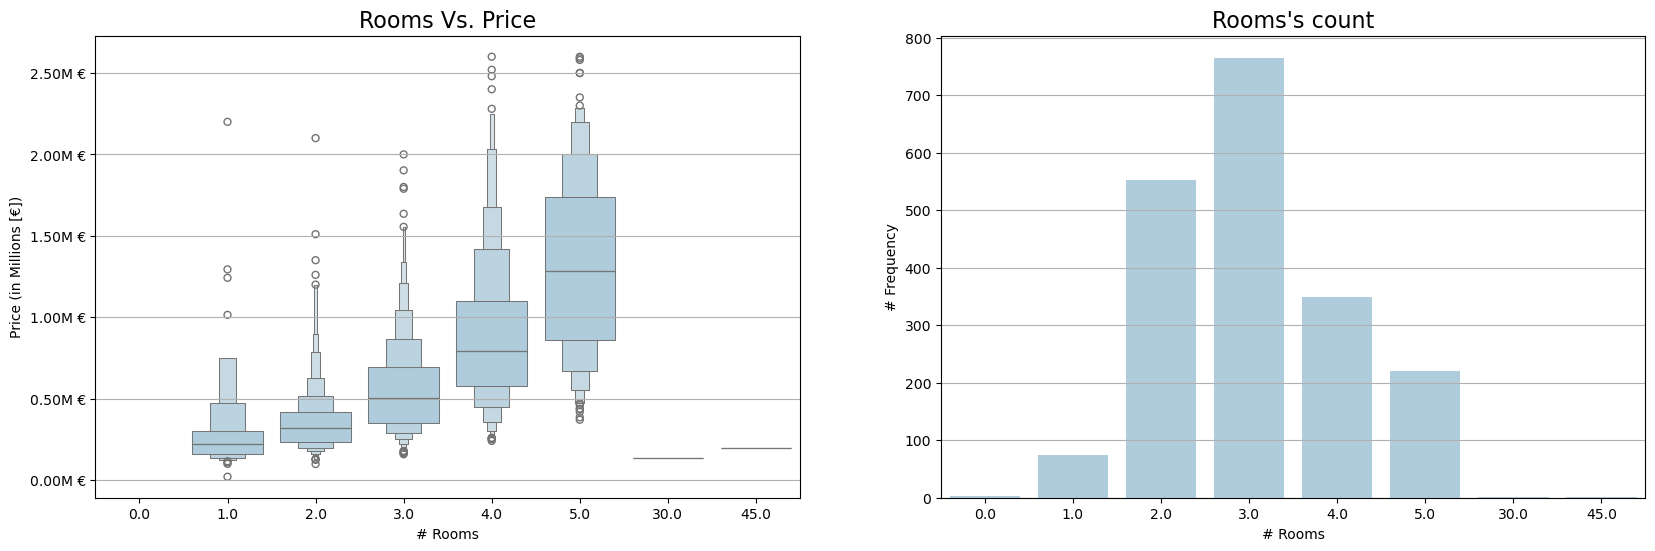

In [54]:
draw_subplots(df_mhp_no_outliers, "rooms")

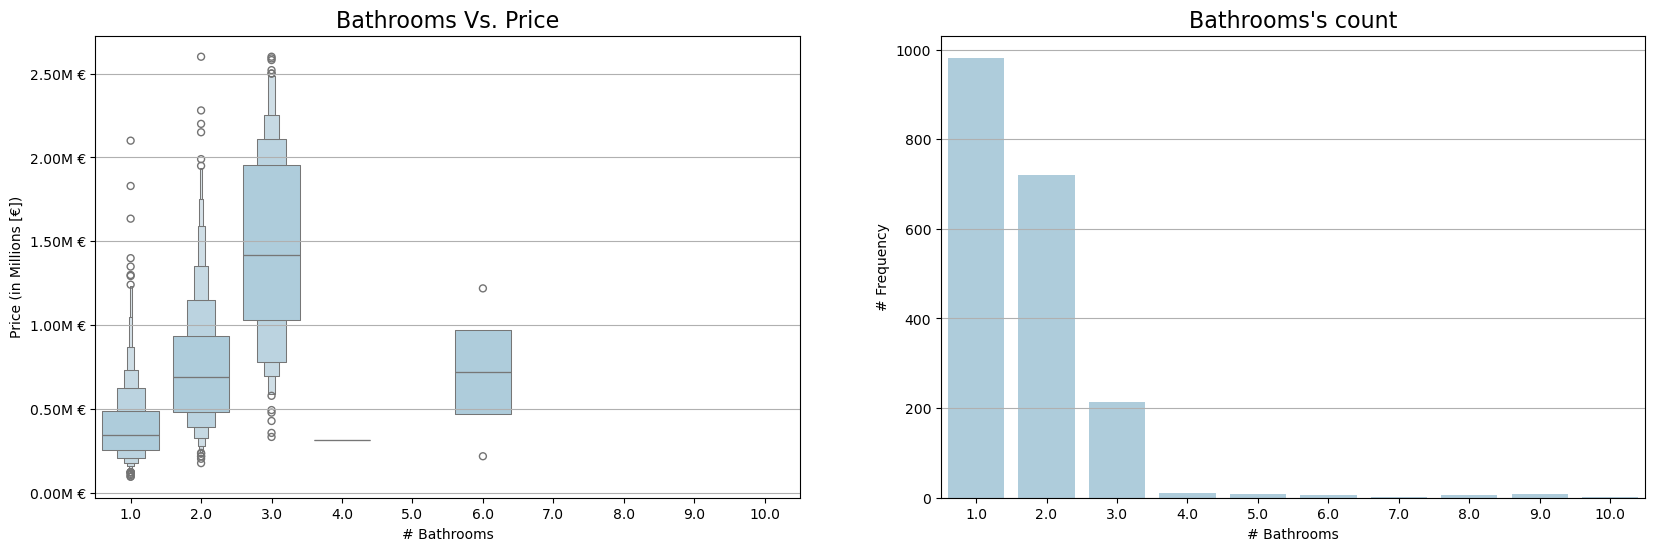

In [55]:
draw_subplots(df_mhp_no_outliers, "bathrooms")

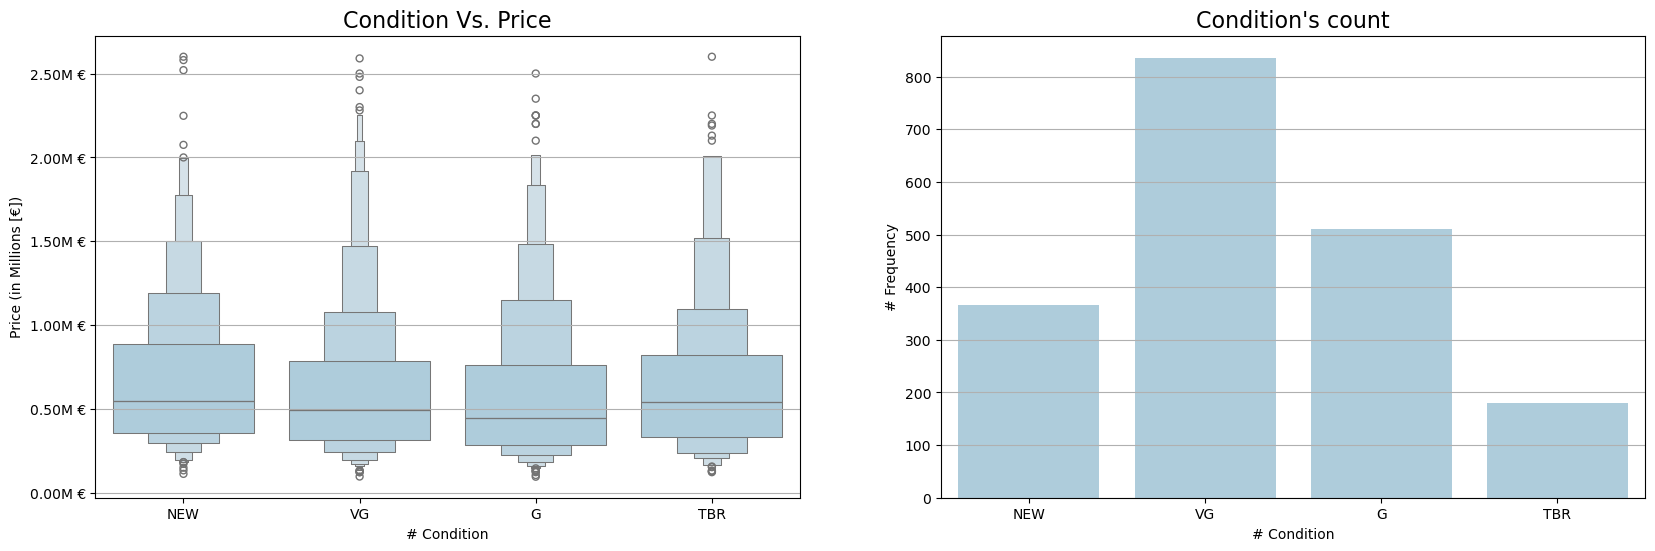

In [56]:
draw_subplots(df_mhp_no_outliers, "condition")

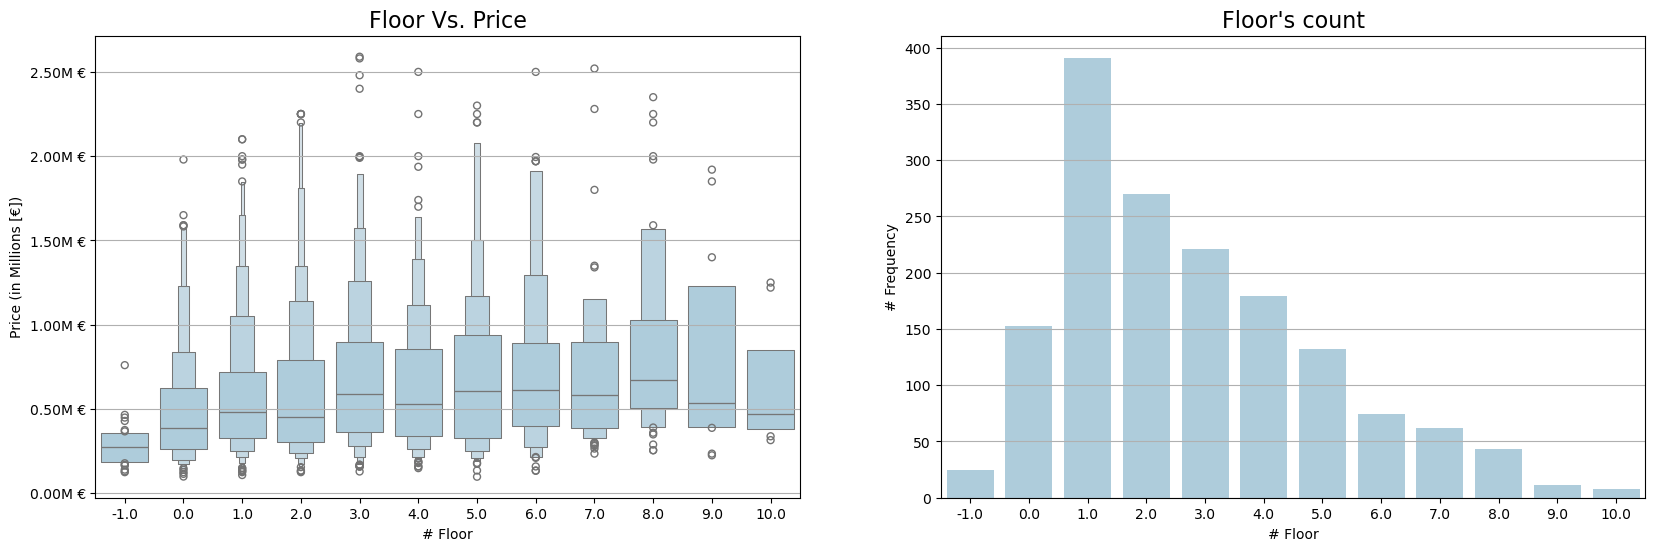

In [57]:
draw_subplots(df_mhp_no_outliers, "floor")

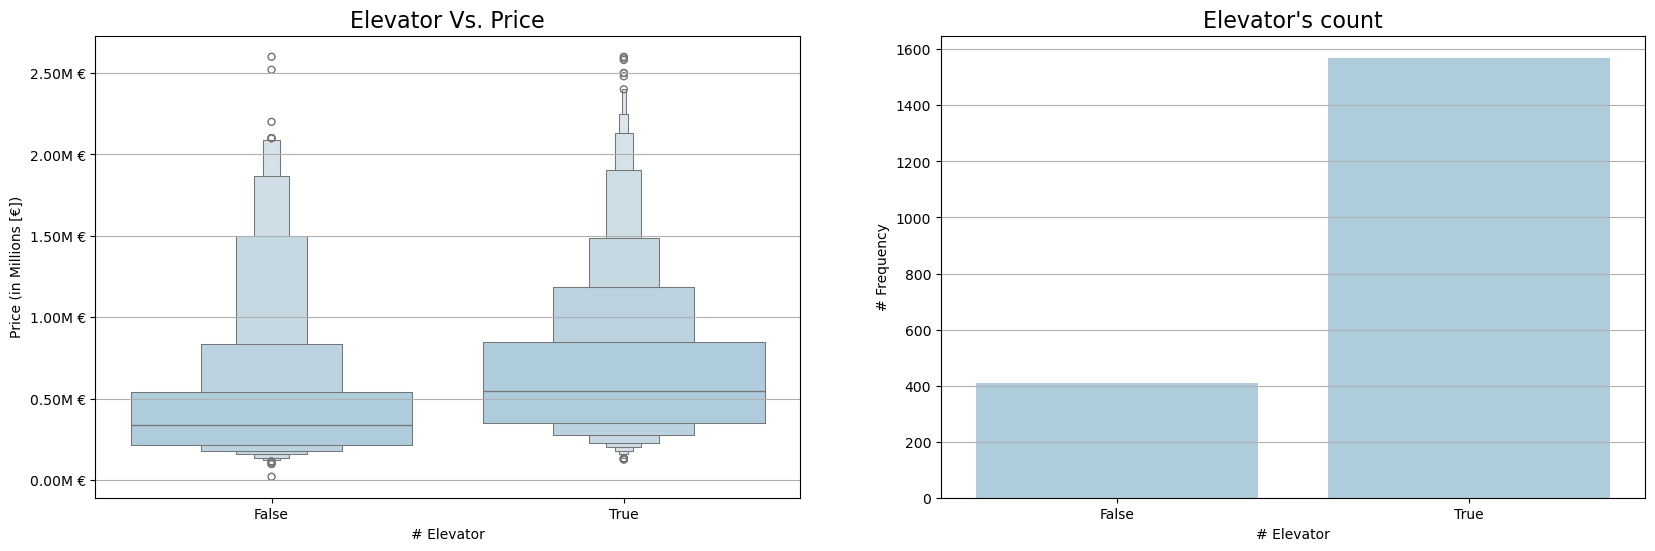

In [58]:
draw_subplots(df_mhp_no_outliers, "elevator")

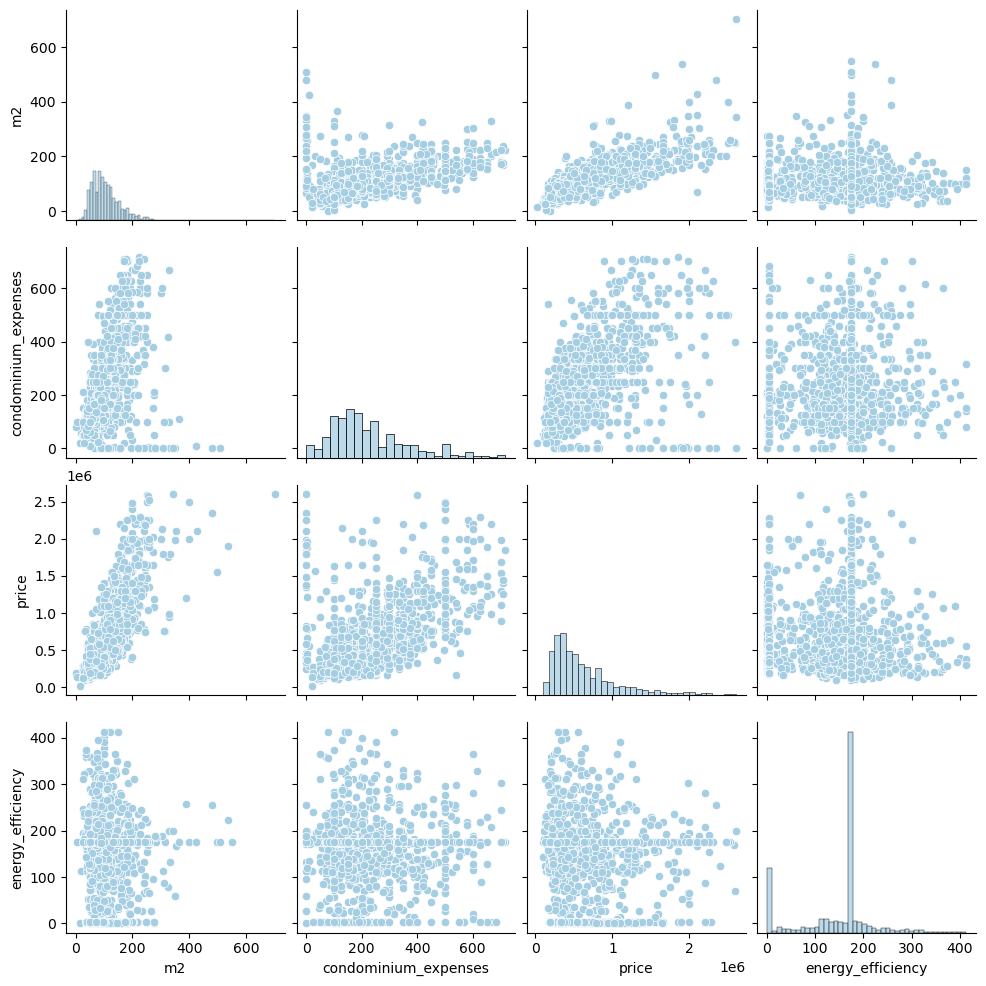

In [59]:
sns.pairplot(df_mhp_no_outliers[['m2', 'condominium_expenses', 'price', 'energy_efficiency']], diag_kind= 'hist')